# Drug Discovery AI Assistant: Demo Workflow
This notebook demonstrates the end-to-end workflow of the Drug Discovery AI Assistant, including API usage and example outputs.

In [1]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CCO')
print(mol)


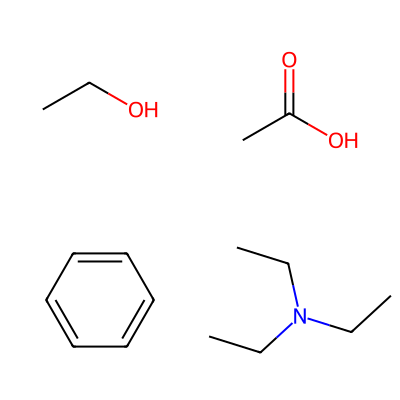

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES list
smiles_list = ['CCO', 'CC(=O)O', 'c1ccccc1', 'CCN(CC)CC']

# Convert to molecules
mols = [Chem.MolFromSmiles(s) for s in smiles_list]

# Visualize molecules
Draw.MolsToGridImage(mols, molsPerRow=2)


In [3]:
from rdkit.Chem import Descriptors

for mol in mols:
    print("SMILES:", Chem.MolToSmiles(mol))
    print("Molecular Weight:", Descriptors.MolWt(mol))
    print("LogP:", Descriptors.MolLogP(mol))
    print("H-bond Donors:", Descriptors.NumHDonors(mol))
    print("H-bond Acceptors:", Descriptors.NumHAcceptors(mol))
    print("---")


SMILES: CCO
Molecular Weight: 46.069
LogP: -0.0014000000000000123
H-bond Donors: 1
H-bond Acceptors: 1
---
SMILES: CC(=O)O
Molecular Weight: 60.05200000000001
LogP: 0.09089999999999993
H-bond Donors: 1
H-bond Acceptors: 1
---
SMILES: c1ccccc1
Molecular Weight: 78.11399999999999
LogP: 1.6866
H-bond Donors: 0
H-bond Acceptors: 0
---
SMILES: CCN(CC)CC
Molecular Weight: 101.193
LogP: 1.3481
H-bond Donors: 0
H-bond Acceptors: 1
---


In [4]:
from rdkit.Chem import AllChem, DataStructs

# Generate Morgan fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024) for m in mols]

# Compute similarity between first two molecules
similarity = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print("Similarity between first two molecules:", similarity)


Similarity between first two molecules: 0.18181818181818182


In [6]:
from rdkit.Chem import AllChem
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example molecules and target property (Molecular Weight)
X = np.array([AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in mols])
X = np.array([np.array(fps) for fps in X])  # Convert bit vectors to array
y = np.array([Descriptors.MolWt(m) for m in mols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 895.8768589799993


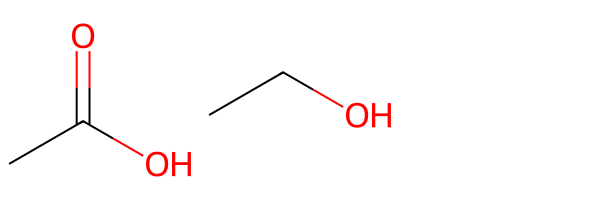

In [7]:
# Visualize top predicted MW molecules
top_idx = np.argsort(y_pred)[-2:]
Draw.MolsToGridImage([mols[i] for i in top_idx])


[20:33:40] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8


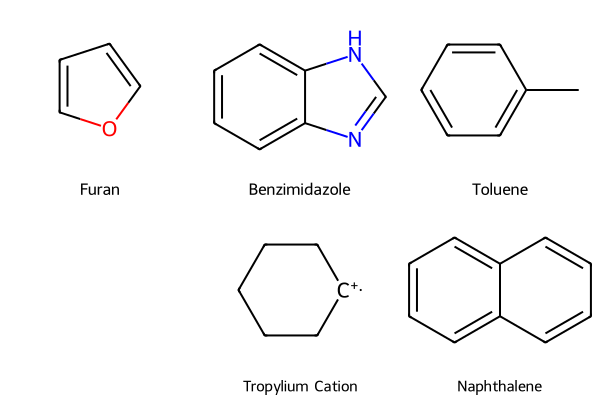

In [9]:
# Import RDKit modules
from rdkit import Chem
from rdkit.Chem import Draw

# List of molecules with names and SMILES
molecules = {
    "Furan": "c1ccco1",
    "Benzimidazole": "c1ccc2[nH]cnc2c1",
    "Toluene": "Cc1ccccc1",
    "Indole": "c1ccc2c(c1)[nH]c=c2",
    "Tropylium Cation": "[C+]1CCCCC1",
    "Naphthalene": "c1ccc2ccccc2c1"
}

# Convert SMILES to RDKit Mol objects
mol_objects = [Chem.MolFromSmiles(smiles) for smiles in molecules.values()]

# Draw molecules in a grid with labels
img = Draw.MolsToGridImage(
    mol_objects, 
    molsPerRow=3, 
    subImgSize=(200, 200), 
    legends=list(molecules.keys())
)

# Display the image (in Jupyter Notebook or VS Code interactive window)
from IPython.display import display
display(img)
